**Visualização de Dados**

In [ ]:
# Importando a biblioteca do pandas
import pandas as pd

In [ ]:
# Efetuado a leitura dos arquivos excel enviados do diretório local 
# para o google drive - temporariamente
df1=pd.read_excel('Aracaju.xlsx')
df2=pd.read_excel('Fortaleza.xlsx')
df3=pd.read_excel('Natal.xlsx')
df4=pd.read_excel('Recife.xlsx')
df5=pd.read_excel('Salvador.xlsx')

In [ ]:
# Como os arquivos tem a mesma estrutura posso unir todos num único dataset.
df=pd.concat([df1,df2,df3,df4,df5])

In [ ]:
# Alterando o tipo de dado de uma das colunas, numérico para string, é interessante fazer isso quando não vou
# utilizar a mesma para cálculos.
df["LojaID"]=df["LojaID"].astype('object')

In [ ]:
# Criando a coluna de "Receitas"
df['Receitas']=df['Vendas'].mul(df['Qtde'])

In [ ]:
# Criando a coluna de "Receitas"
df['Receitas']=df['Vendas'].mul(df['Qtde'])

In [ ]:
# Agora vamos criar uma nova coluna com o ano da venda:
df['Ano_Venda'] = df['Data'].dt.year

In [ ]:
# Agora vou criar uma coluna com a diferença da data de venda e a data mínima
df['diferenca_dias'] = df['Data'] - df['Data'].min()

In [ ]:
# Posso apresentar em que trimestre as vendas ocorreram para isso vou criar uma nova coluna:
df['venda_trimestral'] = df['Data'].dt.quarter

In [ ]:
# Vamos extrair o dia e o mês das vendas, criando 2 novas colunas no dataframe:
df['mes_venda'], df['dia_venda'] = (df['Data'].dt.month, df['Data'].dt.day)

**Visualização de Dados - como podemos apresentar e melhorar as análises através de gráficos**

In [ ]:
# Vamos contar quantas linhas temos por loja no arquivo e apresentar as informações
# já ordenadas do maior para o menor
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

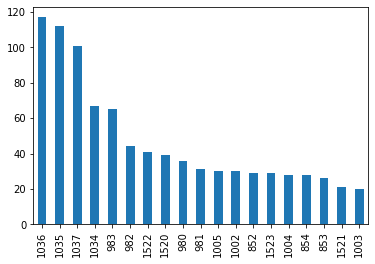

In [ ]:
# Vamos criar com a visualização da tabela anterior um gráfico de barras, 
# basta acrescentar a chamada do método "plot"
df['LojaID'].value_counts(ascending=False).plot.bar()

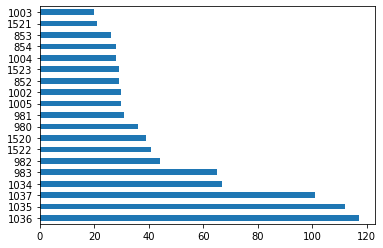

In [ ]:
# Ao invés de barrar verticais eu quero barras horizontais, vou usar o método "barh" ao invés de "bar"
df['LojaID'].value_counts(ascending=False).plot.barh()

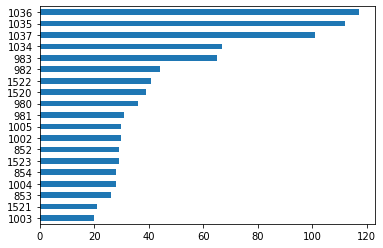

In [ ]:
# Quero alterar a ordem de apresentação dos valores no gráfico horizontal,
# para isso tenho que alterar o parâmetro da seleção na tabela "ascending"
df['LojaID'].value_counts(ascending=True).plot.barh()

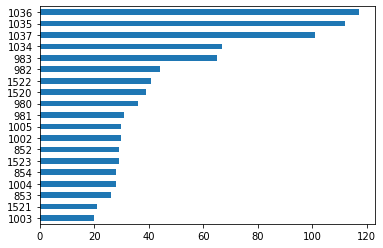

In [ ]:
# Agora quero retirar a linha que é apresentada no topo do gráfico toda vez que o mesmo é apresentado,
# para isso basta acrescentar um ";" ao final do comando anterior
df['LojaID'].value_counts(ascending=True).plot.barh();

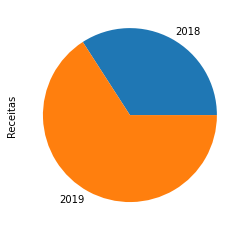

In [ ]:
# A biblioteca do matplotlib tem uma série de formatos de gráficos possíveis,
# vamos criar um gráfico de "pizza":
df.groupby(df['Data'].dt.year)['Receitas'].sum().plot.pie();

In [ ]:
# Vamos obter o total de vendas por cidade para usar no próximo exemplo de gráfico:
df['Cidade'].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

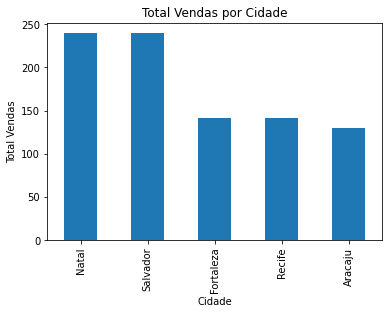

In [ ]:
# Agora vamos colocar um título no gráfico e colocar também identificação nos eixos “X” e “Y”, 
# para isso preciso importar a biblioteca “matplotlib”:
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title='Total Vendas por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Total Vendas');

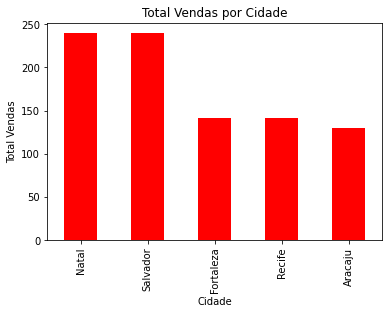

In [ ]:
# Mudando a cor do gráfico:
df['Cidade'].value_counts().plot.bar(title='Total Vendas por Cidade', color='Red')
plt.xlabel('Cidade')
plt.ylabel('Total Vendas');

In [ ]:
# Posso alterar o estilo padrão do gráfico (o matplotlib tem uma infinidade de estilos disponíveis):
plt.style.use('ggplot')

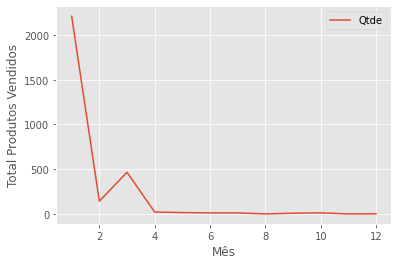

In [ ]:
# Mudando o estilo do gráfico e acrescentando uma legenda:
df.groupby(df['mes_venda'])['Qtde'].sum().plot()
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos')
plt.legend();

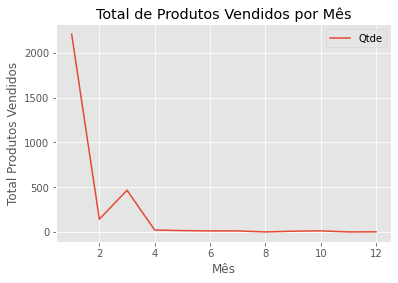

In [ ]:
# Posso acrescentar um título também:
df.groupby(df['mes_venda'])['Qtde'].sum().plot(title='Total de Produtos Vendidos por Mês')
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos')
plt.legend();

In [ ]:
# Vou criar um novo dataframe para apresentar em gráfico:
df.groupby(df['mes_venda'])['Qtde'].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [ ]:
# Vamos criar um dataframe só com as vendas de 2019:
df_2019 = df[df["Ano_Venda"] == 2019]
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

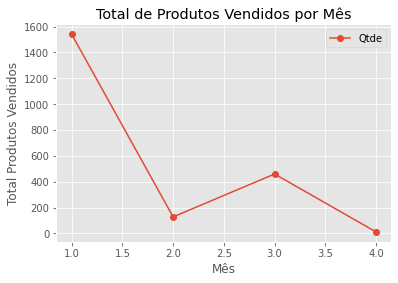

In [ ]:
# Podemos criar agora o gráfico de produtos vendidos por mês do ano de 2019
# e vou acrescentar um marcado para a legenda (temos diversos marcadores “v”, “*”, “o”, etc):
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(title='Total de Produtos Vendidos por Mês', marker = 'o')
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos')
plt.legend();

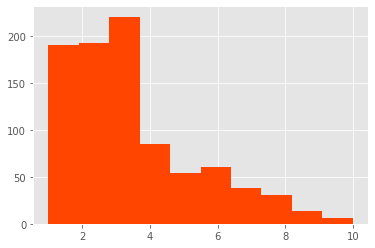

In [ ]:
# Podemos também ter um gráfico do tipo histograma, temos uma infinidade de cores que podem ser utilizadas:
plt.hist(df['Qtde'], color='orangered');

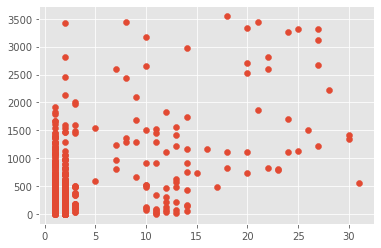

In [ ]:
# Um outro tipo de gráfico é o de dispersão dos valores:
plt.scatter(x=df['dia_venda'], y=df['Receitas']);

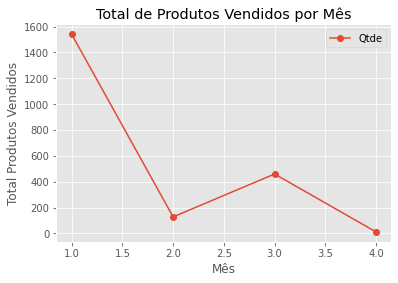

In [ ]:
# Podemos salvar as imagens dos gráficos em um arquivo e podemos fazer "download" do arquivo salvo:
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(title='Total de Produtos Vendidos por Mês', marker = 'o')
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos')
plt.legend()
plt.savefig("Gráfico QTDE vs MÊS.PNG");